In [1]:
import json
import numpy as np
from os import listdir
from os.path import isfile, join
import re
from matplotlib import pyplot as plt
import math

In [2]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def read_json(filename):
    """Reads data from a JSON file.
    :param filename: The path to the JSON file. Note this string must contain the ``.json`` extension.
    :type filename: string
    :returns: The dictionary read from the JSON file.
    :rtype: dict
    """

    with open(filename) as file:
        data_dict = json.load(file)

    return data_dict

def get_nonnegative_rank_data(path, n_range):

    data_dicts = []
    arg_mins = []
    for i in n_range:
        regex = r"^n_" + str(i) + r"_.*"
        
        files = get_data_files(path, regex)
        nmf_dicts = [read_json(file) for file in files]
        data_dicts += [nmf_dicts]
        arg_mins += [np.argmin([data_dict["k"] for data_dict in nmf_dicts])]

    return data_dicts, arg_mins

In [3]:
data_path = "../data/nonnegative_rank/qubit_planar_symmetric/"
n_range = range(2, 38)

nmf_data_dicts, nmf_arg_mins = get_nonnegative_rank_data(data_path, n_range)

min_nmf_data_dicts = [
    nmf_data_dicts[i][nmf_arg_mins[i]]
    for i in range(len(nmf_data_dicts))
]

min_nmf_k = [data_dict["k"] for data_dict in min_nmf_data_dicts]

In [4]:
def lb_k(n):
    k = 1
    while n > math.comb(k, int(np.floor(k/2))):
        k += 1
    
    return k

k_lbs = [lb_k(n) for n in n_range]

NameError: name 'label' is not defined

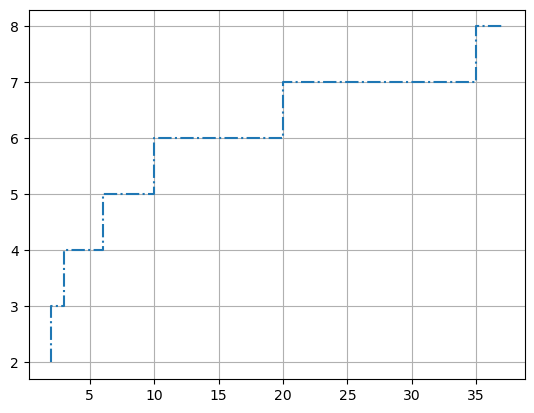

In [5]:
plt.grid()

# plt.step(n_range, [np.ceil(np.log2(n)) for n in n_range], linestyle=":")
plt.step(n_range, k_lbs, linestyle="-.", label=r"Theoretical Lower Bound $\min\{k\;|\; n\leq \binom{k}{\lfloor k/2 \rfloor}\}$")
plt.step(n_range, n_range, label)
plt.step(n_range, [np.floor(n/2) for n in n_range], linestyle="--")

plt.plot(n_range, min_nmf_k, linestyle=":", marker=".", label=r"Numerically Approximate $\rm{Rank}_+(\mathbf{P})$")

plt.legend()

